<a href="https://colab.research.google.com/github/joanizba/Spotifypred/blob/dev_raul/readme_raul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Memoria Técnica – Entorno Big Data con Docker: Cassandra, Hadoop y Apache NiFi

## 🎯 Objetivo

El objetivo de este proyecto es crear un entorno de trabajo con tecnologías Big Data usando **contenedores Docker**, que incluya:

- **Apache Cassandra**: base de datos NoSQL distribuida.
- **Apache Hadoop**: sistema de archivos distribuido (HDFS).
- **Apache NiFi**: plataforma para automatización de flujos de datos.

Todos los contenedores están conectados entre sí mediante una red Docker personalizada.

---

## 🛠 Herramientas utilizadas

- **Docker**
- **Docker Compose**
- **Ubuntu (Host o WSL2)**
- **Google Chrome** (para interfaces web)
- **Google Colab** (para esta documentación)

---

## 📁 Estructura del Proyecto

```text
docker-cluster/
├── docker-compose.yml
└── README.md
```
## 🚀 Pasos para Crear el Entorno Big Data con Docker

### 1. Instalar Docker y Docker Compose

Lo primero es tener Docker y Docker Compose instalados en tu sistema para poder ejecutar los contenedores. Si ya tienes Docker instalado, puedes omitir esta parte.

**Para instalar Docker en Ubuntu:**
```text
sudo apt-get update
```
```text
sudo apt-get install docker.io
```
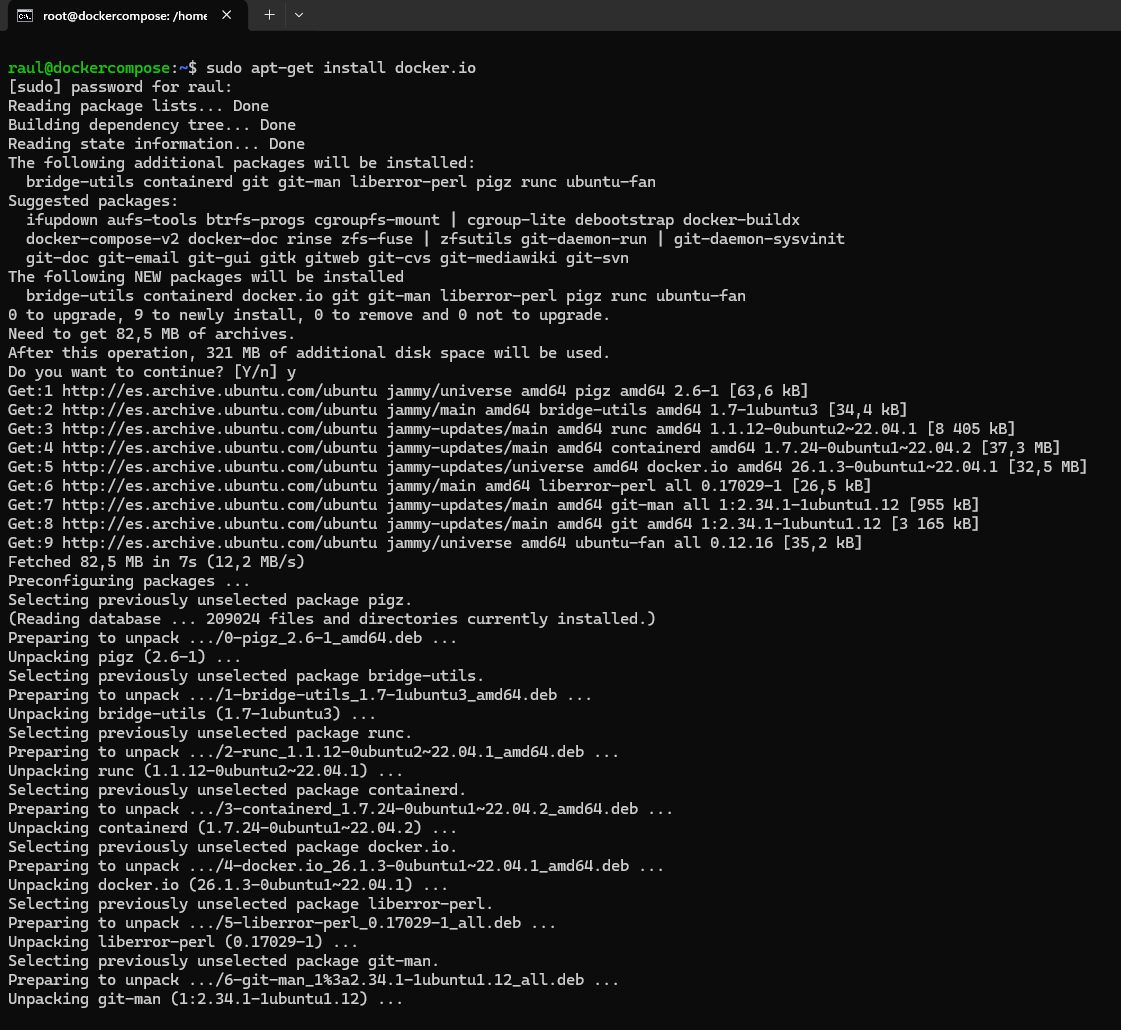
```text
sudo systemctl start docker

sudo systemctl enable docker
```
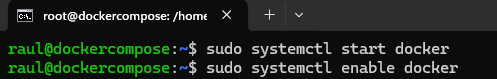

**Para instalar Docker Compose:**
```text
sudo apt-get install docker-compose
```
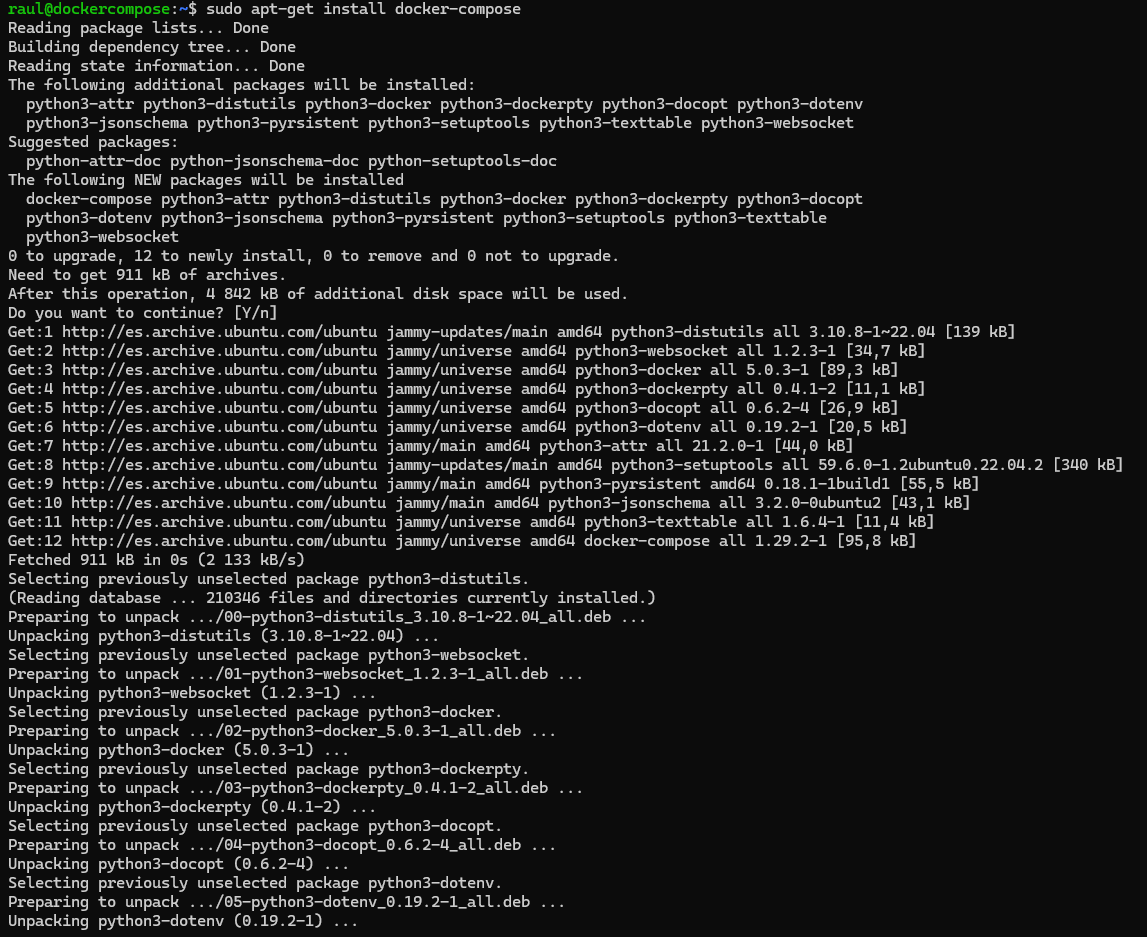



### 2. Configurar el Proyecto
Para que todo funcione, vamos a crear un archivo docker-compose.yml en un directorio de trabajo que especifique cómo crear los contenedores de Cassandra, Hadoop y NiFi.

**Crear el directorio del proyecto:**
```text
mkdir docker-cluster && cd docker-cluster
```
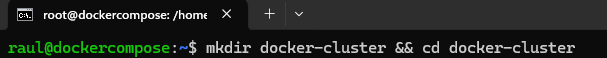

**Crear el archivo docker-compose.yml:**

Este archivo contiene la configuración de los tres contenedores (Cassandra, Hadoop y NiFi) y las redes para conectarlos.
```text
nano docker-compose.yml
```
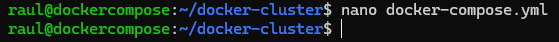


Copia el siguiente contenido dentro de ese archivo.
```text
version: '3.9'

services:
  cassandra:
    image: cassandra:latest
    container_name: cassandra
    environment:
      - CASSANDRA_CLUSTER_NAME=TestCluster
      - CASSANDRA_START_RPC=true
    ports:
      - "9042:9042"
    networks:
      - my_network

  hadoop:
    image: bde2020/hadoop-namenode:latest
    container_name: hadoop
    environment:
      - CLUSTER_NAME=test
    ports:
      - "9870:9870"
      - "9000:9000"
    networks:
      - my_network
    depends_on:
      - cassandra

  nifi:
    image: apache/nifi:latest
    container_name: nifi
    ports:
      - "8080:8080"
    environment:
      - NIFI_WEB_HTTP_PORT=8080
    networks:
      - my_network
    depends_on:
      - cassandra
      - hadoop

networks:
  my_network:
    driver: bridge
```
Tal y como se ve en la fotografia adjunta


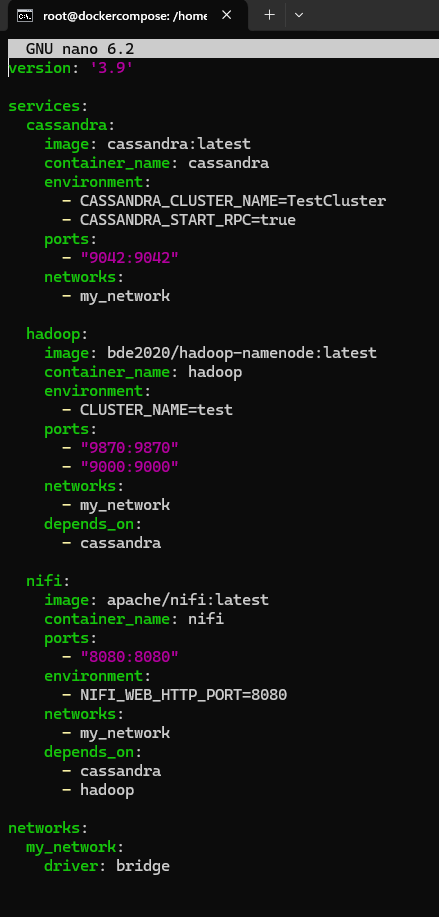

### 3. Levantar los Contenedores
Una vez creado el archivo docker-compose.yml, puedes levantar todos los servicios utilizando el siguiente comando en la misma carpeta donde está el archivo:
```text
docker-compose up -d
```

Tal y como se ve en la fotografia, este comando descargará las imágenes de los contenedores y los ejecutará en segundo plano.


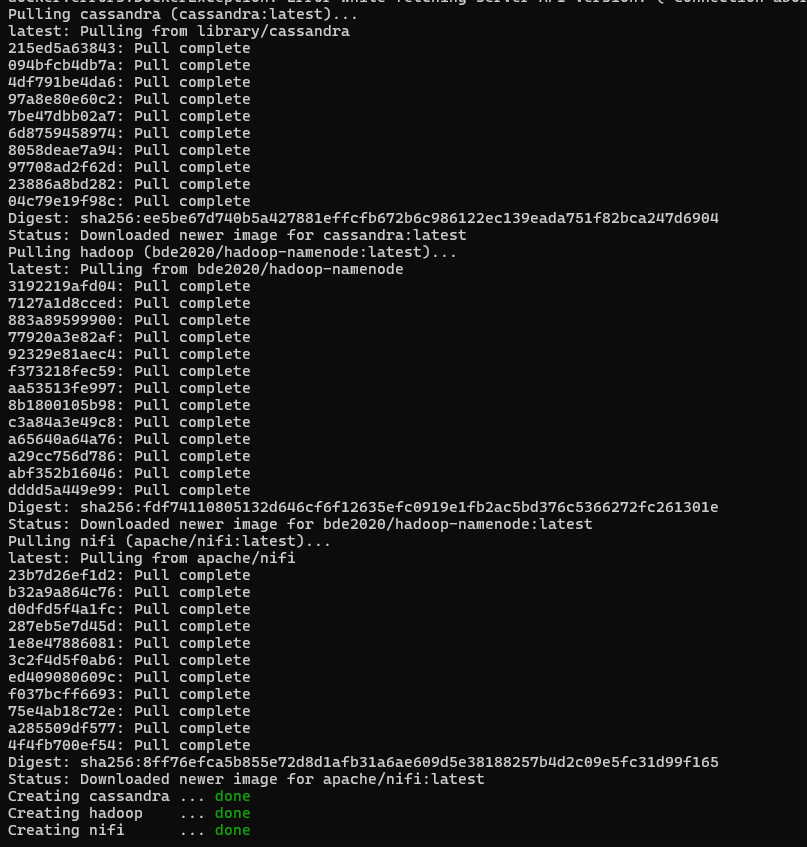

### 4. Verificar que los contenedores estén corriendo
Puedes verificar que todos los contenedores estén funcionando correctamente con:
```text
docker ps
```
Deberías ver los contenedores Cassandra, Hadoop y NiFi en ejecución.
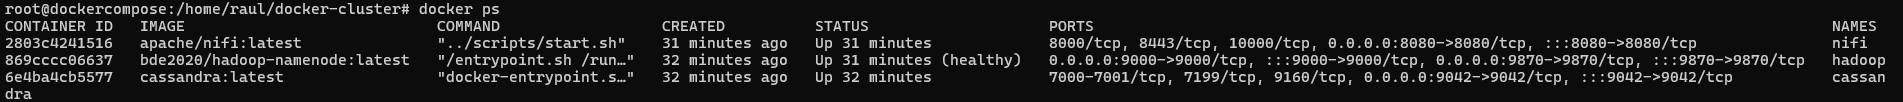

### 5. Acceder a las interfaces web de los servicios
Hadoop: Accede a la interfaz de usuario de Hadoop a través de http://localhost:9870.

NiFi: Accede a la interfaz de usuario de NiFi a través de http://localhost:8080/nifi.

## 🧑‍💻 Conectar Cassandra con NiFi
Ahora vamos a probar la conectividad entre NiFi y Cassandra, para asegurarnos de que los dos servicios se pueden comunicar.

### Acceder al contenedor de NiFi como root
Ejecuta el siguiente comando para acceder al contenedor de NiFi:
```text
docker exec -it --user root nifi /bin/bash
```
### 2. Instalar remsh dentro del contenedor de Hadoop
Para permitir que los contenedores se comuniquen con Cassandra, vamos a instalar remsh en el contenedor de Hadoop (esto es necesario porque no podíamos instalar cqlsh directamente dentro de NiFi).

Dentro del contenedor de Hadoop, instala ``remsh``:
```text
apt update && apt install -y remsh
````
### 3. Conectarse a Cassandra desde Hadoop
Una vez instalado ``remsh``, ahora podrás conectarte al contenedor de Cassandra desde Hadoop utilizando el siguiente comando:
```text
remsh cassandra -l cqlsh 9042
````
Deberías ver un mensaje de conexión similar a este:
```text
Connected to TestCluster at cassandra:9042
````
## 🧹 Detener y Limpiar el Entorno
Una vez que hayas terminado de trabajar, puedes detener los contenedores y limpiar los recursos con:
```text
docker-compose down
```

#BIGQUERY
## **Memoria del Trabajo: Análisis de Datos de Música con BigQuery**
##### **Objetivo**

El objetivo de este trabajo es realizar un análisis de datos utilizando BigQuery, enfocado en la música, específicamente en el análisis de la popularidad y características como la bailabilidad de las canciones a lo largo de los años. A través de consultas SQL complejas y el uso de funciones analíticas de BigQuery, se busca obtener una visión clara sobre las tendencias de la música en términos de popularidad y características musicales clave.


## **Descripción del Dataset**
El dataset proporcionado contiene información sobre canciones de listas de reproducción desde **2010 hasta 2022**, con campos como:

* **Año (year)**: Año de lanzamiento de la canción.

* **Nombre de la canción (track_name)**: El nombre de la canción.

* **Nombre del artista (artist_name)**: El nombre del artista de la canción.

* **Popularidad (track_popularity)**: Índice de popularidad de la canción.

* **Bailabilidad (danceability)**: Mide qué tan bailable es la canción, con valores entre 0 y 1.


## **Consultas Realizadas**
### **1. Análisis de la Popularidad Anual**
Para entender cómo ha cambiado la popularidad de la música a lo largo de los años, se realizó una consulta que calcula el promedio de popularidad por año y el cambio anual comparando con el año anterior.

```text
WITH popularidad_anual AS (
    SELECT
        year,
        AVG(track_popularity) AS promedio_popularidad
    FROM `tu_proyecto.tu_dataset.playlist_data`
    GROUP BY year
)
SELECT
    year,
    promedio_popularidad,
    LAG(promedio_popularidad) OVER (ORDER BY year) AS popularidad_anterior,
    promedio_popularidad - LAG(promedio_popularidad) OVER (ORDER BY year) AS cambio_anual
FROM popularidad_anual
ORDER BY year;
```
### Resultados y conclusiones:

* La popularidad de la música aumentó constantemente desde **2011 hasta 2017**.

* En **2018 y 2020** hubo caídas significativas, especialmente en **2020**, debido posiblemente a la pandemia de COVID-19.

* En **2022**, se produjo una gran recuperación en la popularidad.

## 2. Análisis de la Canción Más Bailable por Año
Utilizando la función **RANK()** de BigQuery, identificamos las canciones más bailables de cada año, basándonos en el valor de **danceability**. Se hizo una clasificación y se extrajo solo la canción más bailable por cada año.

```text
WITH top_danceability AS (
    SELECT
        year,
        track_name,
        artist_name,
        danceability,
        RANK() OVER (PARTITION BY year ORDER BY danceability DESC) AS ranking
    FROM `tu_proyecto.tu_dataset.playlist_data`
    WHERE danceability IS NOT NULL
)
SELECT
    year,
    track_name,
    artist_name,
    danceability
FROM top_danceability
WHERE ranking = 1
ORDER BY year;
```
### Resultados y conclusiones:

Este análisis permite identificar cómo ha cambiado la "bailabilidad" de las canciones año tras año.

Se pueden observar tendencias como el aumento de canciones con mayor danceability en años recientes, especialmente en géneros como el reguetón y el K-pop.

# Conclusiones Generales
* **Tendencias de Popularidad**: A lo largo de los años, se observa que la música tuvo un crecimiento en popularidad, pero sufrió una gran caída en 2020, lo cual podría explicarse por la pandemia que afectó las actividades relacionadas con la música, como conciertos y festivales.

* **Bailabilidad**: La música más bailable cambió con los años. Aunque los géneros más bailables fueron predominantes en años recientes, las características de danceability en las canciones están fuertemente influenciadas por los cambios en las plataformas de música (como TikTok), y la variedad de géneros como reguetón, pop, y K-pop.

* **Impacto de la Pandemia**: La caída en popularidad y la reducción en la bailabilidad en 2020 reflejan los efectos de la pandemia, que alteraron el comportamiento de consumo de música a nivel mundial.




# **📝Proyecto de Obtención de Letras de Canciones (2010–2022)**

**🎯 Objetivo del Proyecto**

El objetivo fue automatizar la obtención de letras de canciones desde archivos CSV de playlists (2010-2022). Para construir un dataset completo y fiable, se combinaron el uso de la API pública lyrics.ovh y técnicas de web scraping en la página letras.com, empleando múltiples fuentes y estrategias.

📁 **Archivos involucrados**  
* `playlist_2010to2022.csv` - Dataset original con canciones y artistas
* `canciones_con_letras.csv` - Salida con canciones + letras encontradas vía API
* `letras_no_encontradas.csv` - Canciones sin letra tras intentar con API
* `urls_letrascom.csv` - URLs encontradas en letras.com para scraping
* `urls_letrascom_cleaned.csv` - URLs limpias y preparadas para scraping
* `letras_com_scrapeadas_corregido.csv` - Letras finales obtenidas vía scraping

## 🔧 Código 1 – `obtener_letras_api.py`
**📌 Función principal:**

Utiliza la API pública `lyrics.ovh` para obtener letras automáticamente a partir de artista + título.

**⚙️ Descripción del funcionamiento:**

1.  Carga el CSV original.

2. Verifica que tenga las columnas necesarias.

3. Recorre canción por canción, y llama a:
**`https://api.lyrics.ovh/v1/{artist}/{title}`**

4. En el caso de que no encuentre la letra, la guarda. Si no, almacena el título en una lista para intentar más adelante con scraping.

### 🟢 Resultado:
Letras disponibles: se guardan en **`canciones_con_letras.csv.`**

Letras no encontradas: se guardan en **`letras_no_encontradas.csv.`**

### ⚠️ Errores detectados:
* Muchos títulos/artistas no devuelven letras por errores de formato (tildes, caracteres especiales).

* La API tiene resultados inconsistentes y no reconoce bien artistas internacionales o en español.

* Se incluyó **`time.sleep(2)`** entre peticiones para evitar bloqueos.

## 🔧 Código 2 – `buscar_urls_letrascom.py`
**📌 Función principal:**

Busca URLs de canciones en `letras.com` para aquellas que no pudieron obtenerse con la API.

**⚙️ ¿Cómo lo hace?**

1. Intenta una URL directa generando un slug (formato URL amigable) del artista y la canción.

2. Si falla, hace una búsqueda manual:
**`https://www.letras.com/buscar/{track_name + artist_name}`**

3. Extrae la primera URL válida del resultado de búsqueda (`<a class="song-name">`).

4. Guarda la URL en urls_letrascom.csv.

### ✅ Resultado:
Obtiene una buena cantidad de URLs válidas de letras no encontradas anteriormente, que más tarde, podremos usar para hacer scrapling utlizando esta misma página web.

### ⚠️ Errores y ajustes:
* Algunos nombres no generaban slugs válidos → se creó función slugify.

* El scraping directo de los resultados requería un user-agent realista.

* Se evitó Selenium (aunque se valoró), ya que:

* Aumentaba complejidad.

* No era necesario para páginas simples como letras.com.

* El HTML podía manejarse con requests + BeautifulSoup.

## 🔧 Código 3 – `scrapear_letras_letrascom.py`
**📌 Función principal:**

Accede a cada URL obtenida de letras.com y extrae el texto de la letra mediante scrapling.

**⚙️ ¿Cómo lo hace?**
1. Se accede con requests con un `user-agent` personalizado.

2. Se usa BeautifulSoup para encontrar el `<div class="lyric-original">`, donde está la letra.
2.2 Cabe resaltar que probamos con diferentes páginas web para hacer scrapling, pero en el momento de sacar las letras de las URLs de las canciones, no podíamos ya que tenian la clases dinámicas. Esto nos paso con **`Genius`**.

3. Se limpian los espacios y se formatea el texto adecuadamente.

4. Guarda el resultado en letras_com_scrapeadas_corregido.csv.

### ⚠️ Problemas y soluciones:
    * Problema	Solución implementada
    Algunas letras no estaban en el HTML - Se detectó el mensaje "letra no disponible" y se omitió.
    HTML dinámico no cargado	         - Se descartó usar Selenium por simplicidad y eficiencia.
    Dificultades de codificación	     - Se forzó utf-8 y, como fallback, latin-1.
    Saltos de línea perdidos	         - Se usó .get_text(separator="\n", strip=True) para conservarlos.

### Resultado:
Se logró scrapear la mayoría de las letras restantes de forma efectiva, ampliando el dataset con información valiosa.

## 🧪 Herramientas Consideradas pero NO utilizadas

| Herramienta             | Motivo de descarte                                                                                                                               |
|-------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------|
| Selenium                | Se consideró al principio para scrapear `letras.com` en caso de HTML dinámico. Pero al ser contenido estático y bien estructurado, no era necesario. Además, Selenium requería más dependencias, navegador, y era más lento. |
| APIs alternativas (Genius, Musixmatch, etc.) | Requieren autenticación (API key) y tienen límites estrictos o cobran. No eran viables para scraping automatizado sin riesgo de bloqueo. |
| Scrapy                  | Es potente, pero innecesario para la escala y simplicidad de este scraping. Se optó por `requests + BeautifulSoup` por ser más ligero.           |




# 🎶 Análisis de Letras de Canciones – Punto 2: Lenguaje y Estilo

Este análisis forma parte de un proyecto de NLP aplicado a letras de canciones. El objetivo del **Punto 2** es estudiar las propiedades lingüísticas básicas de las letras recopiladas en dos datasets distintos que se unificaron previamente.

---

## 📂 Estructura del dataset

- **letras_com_scrapeadas_corregido.csv**
- **canciones_con_letras.csv**

Ambos archivos fueron combinados para formar un solo corpus de letras. Las columnas relevantes fueron:

- `track_name`
- `artist_name`
- `lyrics`

---

## 🧼 Preprocesamiento realizado

1. Conversión de texto a minúsculas
2. Eliminación de puntuación y símbolos
3. Tokenización por espacios
4. Unión de los datasets

---

## 🔍 Análisis realizado

### 1. Palabras más comunes

Se analizaron las 20 palabras más frecuentes en el corpus total de letras. Las más comunes fueron:

- **you, i, me, love, know, like**, etc.

Estas palabras reflejan el estilo íntimo y emocional de muchas canciones, especialmente en géneros como el pop, R&B y baladas.

### 2. Riqueza léxica

Se calculó como:


- Valores bajos indican letras muy repetitivas.
- Valores altos indican diversidad de vocabulario.
- La mayoría de canciones tienen una riqueza entre **0.2 y 0.5**.

### 3. Longitud de las letras

- La longitud promedio se encuentra entre **200 y 400 palabras**.
- Muchas canciones cortas (<100 palabras) y algunas muy largas (>1000 palabras), lo que sugiere variedad de géneros o estilos.

---

## 📊 Visualizaciones generadas

- Gráfico de barras: top 20 palabras más comunes
- Histograma: distribución de riqueza léxica
- Histograma: distribución de longitud de las letras

---

## 📌 Conclusiones

- Las letras tienen un enfoque personal y emocional.
- Predomina un lenguaje informal.
- Hay gran variabilidad en longitud y riqueza, lo que sugiere mezcla de géneros.

---

> En la siguiente etapa (Punto 4), se procederá a extraer los **tópicos o temas comunes** presentes en las letras mediante técnicas de modelado de temas.



# 🎵 Análisis de Tópicos en Letras de Canciones por Género Musical – Punto 4

Este proyecto utiliza técnicas de modelado de tópicos (LDA) para analizar las letras de canciones y descubrir patrones temáticos dominantes asociados a distintos géneros musicales.

## 📌 Descripción

Se identificaron 5 tópicos dominantes a partir de las letras de canciones utilizando un modelo de LDA y se visualizó su distribución por género musical mediante un mapa de calor.

## 📁 Estructura del Proyecto

- `playlist_con_letras.csv`: Dataset base con información de canciones.
- `analisis_lda.py`: Script principal para análisis y visualización.
- `memoria.txt`: Documento con interpretación detallada y conclusiones del análisis.

## 🧪 Tecnologías

- Python
- Pandas, Numpy, Matplotlib, Seaborn, Scikit-learn, NLTK

## 📊 Resultados

- Asociación clara entre ciertos tópicos y géneros (ej. Trap Latino con temáticas urbanas).
- Detección de diferencias entre letras en español e inglés.
- Utilidad para clasificación musical, análisis de audiencias y sistemas de recomendación.

## 📚 Referencias

- LDA: Latent Dirichlet Allocation (Blei et al., 2003)
- Dataset: Letras y géneros extraídos desde una playlist de Spotify



# 🎶 Análisis de Letras de Canciones – Punto 6: Frecuencia y Similitud

Este proyecto utiliza Python y diversas bibliotecas de análisis de datos y visualización para explorar un conjunto de datos de letras de canciones. Realiza análisis de frecuencia de palabras y calcula la similitud léxica entre diferentes canciones y artistas.

## Características Principales

* **Análisis de Frecuencia de Palabras:**
    * Compara las palabras más utilizadas por un artista angloparlante (Taylor Swift) y un artista hispanohablante (Bad Bunny).
    * Analiza la evolución de las palabras más frecuentes en las letras de Coldplay a lo largo de dos décadas (2000s vs. 2010s).
* **Análisis de Similitud de Letras:**
    * Calcula y visualiza la similitud (usando TF-IDF y similitud del coseno) entre letras de 10 canciones de artistas diversos.
    * Calcula y visualiza la similitud entre letras de canciones pertenecientes a un mismo género musical (Pop).
* **Limpieza de Texto:** Incluye un preprocesamiento de las letras para normalizar el texto, eliminar caracteres no alfabéticos y filtrar stopwords en inglés y español.

## Requisitos Previos

* Python 3.x
* Las siguientes bibliotecas de Python:
    * `pandas`
    * `matplotlib`
    * `seaborn`
    * `scikit-learn`
    * `collections` (generalmente viene con Python estándar)
    * `re` (generalmente viene con Python estándar)
* Un archivo de datos llamado `playlist_con_letras.csv` en el mismo directorio que el script.

## Estructura del Archivo de Datos (`playlist_con_letras.csv`)

El archivo CSV debe contener al menos las siguientes columnas:

* `artist_name`: Nombre del artista.
* `track_name`: Nombre de la canción.
* `lyrics`: Letra de la canción.
* `year`: Año de lanzamiento de la canción (para el análisis de Coldplay).

## Instalación

1.  Asegúrate de tener Python 3 instalado.
2.  Clona este repositorio o descarga los archivos.
3.  Instala las bibliotecas necesarias. Puedes hacerlo usando pip:

    ```bash
    pip install pandas matplotlib seaborn scikit-learn
    ```

## Uso

1.  Coloca tu archivo `playlist_con_letras.csv` en el mismo directorio que el script de Python.
2.  Ejecuta el script desde tu terminal:

    ```bash
    python tu_script.py
    ```

    (Reemplaza `tu_script.py` con el nombre real de tu archivo Python).

3.  El script generará y mostrará varios gráficos como salida.

### Salidas Esperadas (Visualizaciones)

A continuación se describe qué gráficos se generan y dónde irían las imágenes si las añadieras a este README.

1.  **Análisis de Frecuencia: Taylor Swift vs. Bad Bunny**
    * Descripción: Dos diagramas de barras mostrando las 15 palabras más frecuentes para Taylor Swift y Bad Bunny, respectivamente, después de la limpieza y eliminación de stopwords.
    * *Aquí podrías insertar una imagen del gráfico:*
        `![Frecuencia de Palabras: Taylor Swift vs. Bad Bunny](ruta/a/imagen_frecuencia_taylor_badbunny.png)`

2.  **Análisis de Frecuencia: Coldplay por Décadas**
    * Descripción: Dos diagramas de barras mostrando las 15 palabras más frecuentes en las canciones de Coldplay de la década de 2000 y la década de 2010.
    * *Aquí podrías insertar una imagen del gráfico:*
        `![Frecuencia de Palabras: Coldplay 2000s vs 2010s](ruta/a/imagen_frecuencia_coldplay_decadas.png)`

3.  **Similitud entre Letras (Artistas Diferentes)**
    * Descripción: Un mapa de calor (heatmap) que muestra la similitud del coseno entre las letras de 10 canciones seleccionadas aleatoriamente de artistas diferentes.
    * *Aquí podrías insertar una imagen del heatmap:*
        `![Similitud Letras: Artistas Diversos](ruta/a/imagen_similitud_diversos.png)`

4.  **Similitud entre Letras (Mismo Género - Pop)**
    * Descripción: Un mapa de calor (heatmap) que muestra la similitud del coseno entre las letras de varias canciones seleccionadas del género Pop.
    * *Aquí podrías insertar una imagen del heatmap:*
        `![Similitud Letras: Género Pop](ruta/a/imagen_similitud_pop.png)`

## Personalización

* **Artistas para Análisis de Frecuencia:** Puedes cambiar los artistas en la lista `artists_to_compare` en la sección 1 del script.
* **Artistas para Análisis de Género:** Modifica la lista `pop_artists_list` en la sección 4 para incluir diferentes artistas del género que desees analizar, o cambia el género por completo.
* **Número de Palabras/Canciones:** Ajusta el número de palabras más comunes (`most_common(15)`) o el número de canciones en las muestras (`sample(10)`) según tus necesidades.
* **Stopwords:** Puedes expandir las listas `basic_stopwords_en` y `basic_stopwords_es` si identificas más palabras comunes que deseas excluir del análisis.

---

# 🎶 Análisis de Letras de Canciones – Punto 7: Tendencias y Contexto Social

Este análisis forma parte de un proyecto de NLP aplicado a letras de canciones. El **Punto 7** examina cómo eventos sociales relevantes (como la pandemia de COVID-19) y factores lingüísticos (idioma del artista) se reflejan en el contenido lírico.

---

## 📂 Estructura del Dataset

- `playlist_con_letras.csv`

Columnas clave:
- `artist_name`: Nombre del artista
- `track_name`: Nombre de la canción
- `lyrics`: Letra completa
- `year`: Año de lanzamiento

---

## 🧼 Preprocesamiento realizado

1. Conversión a minúsculas  
2. Eliminación de signos de puntuación y caracteres no alfabéticos  
3. Normalización de contracciones  
4. Tokenización  
5. Eliminación de stopwords (en inglés y español)

---

## 🔍 Análisis realizado

### 1. Impacto de la Pandemia de COVID-19 🦠

Comparativa de frecuencia relativa de palabras clave entre dos periodos:

- **Antes de la pandemia**: 2017–2019  
- **Durante la pandemia**: 2020–2022

📌 Hallazgos principales:
- **Incremento notorio** de términos como: `virus`, `covid`, `pandemia`, `mascarilla`, `confinamiento`, `distancia`.
- **Temas emocionales y personales** más presentes: `casa`, `solo`, `miedo`, `salud`, `esperanza`.
- **Mayor expresión en español** para términos sanitarios, como `mascarilla` y `confinamiento`.

📊 Visualización:
- Gráfico de barras de frecuencias relativas (ej. `image_c58441.png`)  
  `![Impacto de la Pandemia en Letras](ruta/a/tu/image_c58441.png)`

---

### 2. Comparativa Lingüística: Hispanohablantes vs. Angloparlantes 🗣️

Análisis basado en la agrupación manual de artistas según idioma predominante.

📌 Hallazgos principales:

- **Code-switching** en artistas hispanohablantes:  
  Palabras como `baby`, `like`, `love`, `one`, `theres` aparecen con alta frecuencia en letras en español.

- **Vocabularios representativos**:  
  - **Angloparlantes**: `like`, `love`, `got`, `baby`, `time`, `never`, `ooh`  
  - **Hispanohablantes**: `quiero`, `bien`, `dura`, `contigo`, `mami`, `corazón`, `noche`, `uoh`

- **Diferencia en tamaño de corpus**:  
  El corpus en inglés fue notablemente más grande que el de español, lo que puede influir en la diversidad léxica observada.

---

## 🧪 Metodología

- Herramientas utilizadas:
  - `Python`, `Pandas`, `NLTK`, `Matplotlib`, `Seaborn`
- Técnicas:
  - Cálculo de frecuencias relativas (por cada 10,000 palabras)
  - Extracción de n-gramas
  - Visualización comparativa por periodo o grupo

---

## 📌 Conclusiones

- Las letras reflejan cambios sociales importantes: la pandemia se manifiesta explícitamente en el lenguaje.
- El **code-switching** (uso de inglés en letras en español) es común entre artistas hispanos contemporáneos.
- A pesar de diferencias culturales y lingüísticas, **temas universales como el amor** siguen predominando en ambos grupos.
- El análisis de letras musicales ofrece una ventana cuantitativa a **tendencias culturales y sociales** en la música popular.

---


